station-control-client version '9.8.0' is newer minor version than '9.4.0' used by the station control server, some new client features might not be supported.
/home/xederro/.pyenv/versions/3.11.13/lib/python3.11/site-packages/qiskit_aer/noise/noise_model.py:376: UserWarning: Qiskit backend <iqm.qiskit_iqm.iqm_provider.IQMBackend object at 0x7feb4189c290> has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


Running on Spark
Counts(noise): {'0000': 500, '1111': 500}


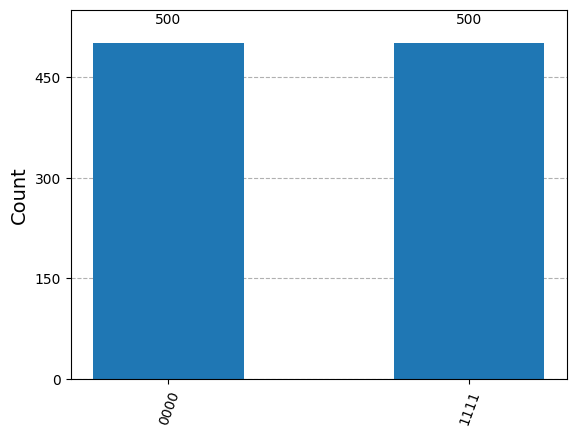

In [1]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.visualization import plot_histogram
from iqm.qiskit_iqm import IQMProvider
import os
import numpy as np

num_shots = 1000
n = int(input("No. of qbits? "))
spark = bool(int(input("Run on spark? ")))

if n < 1:
    print("Invalid input")
    exit()

if spark:
    os.environ["IQM_TOKENS_FILE"] = r"/home/xederro/.cache/iqm-client-cli/tokens.json"
    IQM_URL = "https://odra5.e-science.pl/station"
    provider = IQMProvider(IQM_URL)
    backend = provider.get_backend()
    # backend = AerSimulator.from_backend(provider.get_backend())
    print("Running on Spark")
else:
    sim = FakeManilaV2()
    backend = AerSimulator.from_backend(sim)
    print("Running on local simulator")

circuit = QuantumCircuit(n)

circuit.h(0)
for i in range(n-1):
    circuit.cx(0, i+1)
circuit.measure_all()

circuit.draw(output='mpl')

transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl', style="iqp")

result = backend.run(transpiled_circuit, shots=num_shots).result()
counts = result.get_counts(0)
print('Counts(noise):', counts)
plot_histogram(counts)